# Conocimiento de código

## Librerías y funciones

In [28]:
import pandas as pd
import numpy as np
import os


# 27/10/2023
import matplotlib as plt

## Lectura de datos

Vamos a primero comprender los disntintos datasets que nos han facilitado el concurso. Para ello, vamos a cargar los datos y a ver qué información contienen.

In [3]:
directorio = '../apau-smog-prediction/'
lista = os.listdir(directorio)
for i in lista:
    exec(i.split('.')[0] + ' = pd.read_csv(directorio + i)')


- sample_subsimmision, ejemplo de cómo debe ser el fichero de salida (la predicción)
- test_nolabel, datos de test sin etiquetar (podemos observar que no tenemos la columna de la etiqueta -Smog-)
- train, datos de entrenamiento 



In [4]:
sample_submission.head()

,id,Predicted
0,2be023f9102,2
1,a320ba7de7b,3
2,2879e8fa078,0
3,a561b6ee65b,2
4,94c225dd8e9,1


In [20]:
test_nolabel.head()

,id,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km)
0,2be023f9102,2022,Jeep,Wagoneer 4X4,SUV: Standard,5.7,8,A8,X,15.6,11.7,13.8,20,323
1,a320ba7de7b,2022,Porsche,718 Boxster,Two-seater,2.0,4,M6,Z,11.7,8.9,10.5,27,245
2,2879e8fa078,2022,Chrysler,Grand Caravan,Minivan,3.6,6,A9,X,12.4,8.4,10.6,27,249
3,a561b6ee65b,2022,Kia,Sorento AWD,SUV: Small,2.5,4,AM8,X,10.9,8.7,9.9,29,234
4,94c225dd8e9,2022,Bentley,Continental GT,Subcompact,4.0,8,AM8,Z,14.9,9.0,12.2,23,287


In [21]:
train.head()

,id,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),Smog
0,ab44e9bec15,2022,Mercedes-Benz,A 250 4MATIC Hatch,Station wagon: Small,2.0,4,AM7,Z,10.0,7.0,8.7,32,202,2
1,45926762371,2022,Mazda,Mazda3 5-Door,Mid-size,2.0,4,AS6,X,8.6,6.7,7.7,37,181,4
2,e9be56e153f,2022,Porsche,Panamera 4 ST,Full-size,2.9,6,AM8,Z,12.8,10.2,11.7,24,274,2
3,077092760df,2022,Mazda,CX-3 4WD,Compact,2.0,4,AS6,X,8.6,7.4,8.1,35,189,1
4,c1c2579b795,2022,Aston Martin,DBS V12,Minicompact,5.2,12,A8,Z,16.4,10.7,13.8,20,324,1


## Limpieza de datos

La limpieza de datos se va a llevar a cabo sobre dataset de entrenamiento y de test. Dicha limpieza consiste en:
1. Encontrar valores nulos y estudiar si se pueden eliminar o rellenar con algún valor
2. Descubrir outliers y estudiar si se pueden eliminar o rellenar con algún valor
3. Estudio de variables que puedan ser buenos predictores






Primero vamos a encotrar los valores nulos:

In [26]:
columns = train.columns

for column in columns:
    text = f'NaN? - {column.upper()}'
    isNa = train[column].isna().any()
    print(f'{text.ljust(50)} {isNa}')

NaN? - ID                                          False
NaN? - MODEL YEAR                                  False
NaN? - MAKE                                        False
NaN? - MODEL                                       False
NaN? - VEHICLE CLASS                               False
NaN? - ENGINE SIZE (L)                             False
NaN? - CYLINDERS                                   False
NaN? - TRANSMISSION                                False
NaN? - FUEL TYPE                                   False
NaN? - FUEL CONSUMPTION CITY (L/100 KM)            False
NaN? - HWY (L/100 KM)                              False
NaN? - COMB (L/100 KM)                             False
NaN? - COMB (MPG)                                  False
NaN? - CO2 EMISSIONS (G/KM)                        False
NaN? - SMOG                                        False


Vemos que no hay un valor NaN en todo el dataset, por lo que no es necesario rellenar ningún dato.

Ahora, visualicemos con histogramas todos los datos que sean de tipo entero:

array([[<Axes: title={'center': 'Model Year'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Comb (mpg)'}>,
        <Axes: title={'center': 'CO2 Emissions (g/km)'}>],
       [<Axes: title={'center': 'Smog'}>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

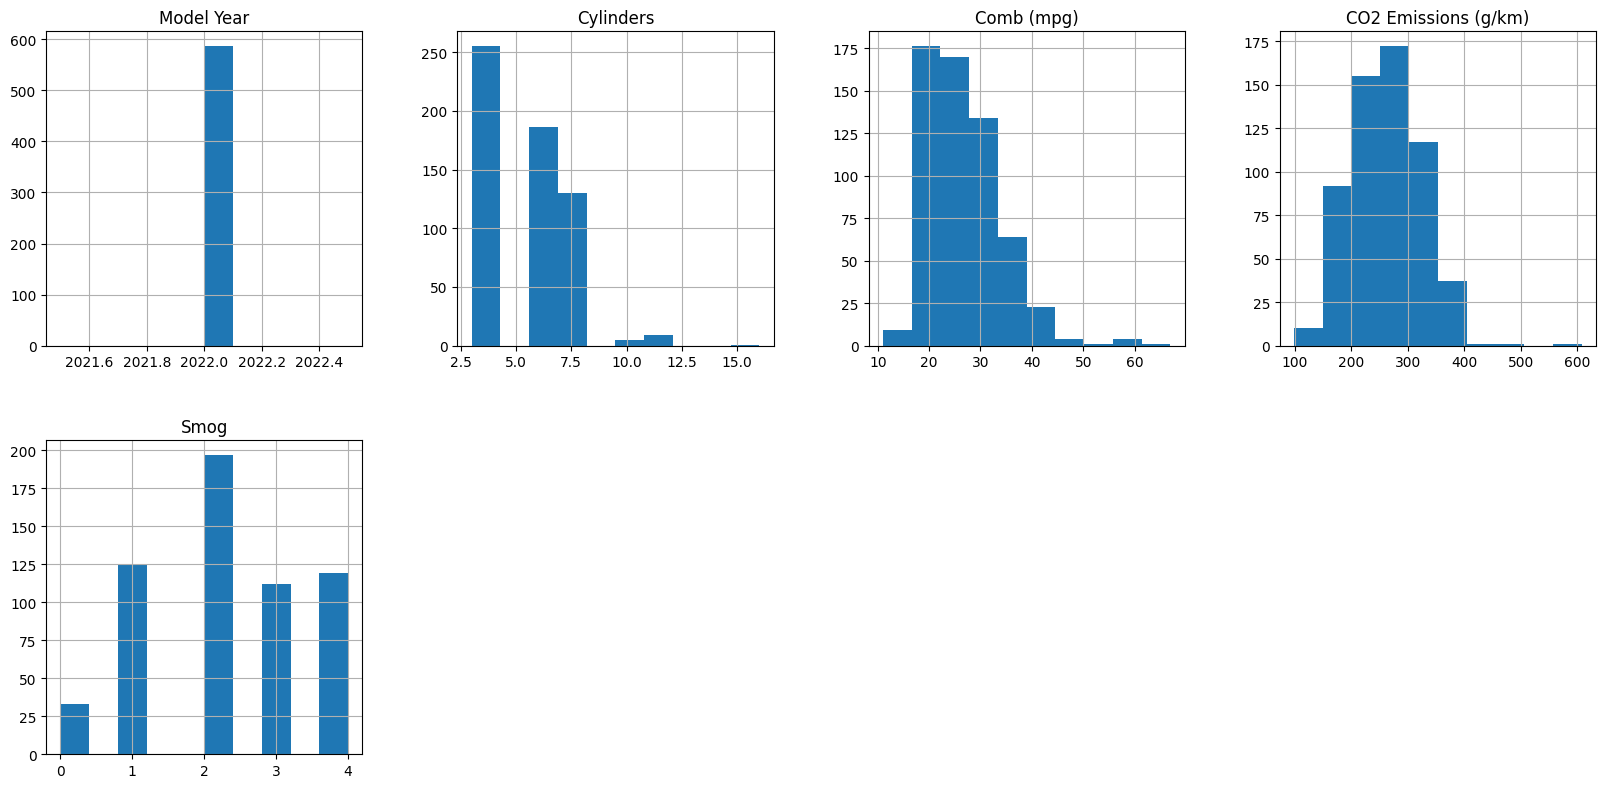

In [52]:
nearest_square = lambda number: np.power(np.round(np.sqrt(number)), 2)

int_columns = train.select_dtypes(include=int)
sq = int(nearest_square(len(int_columns.columns)))

int_columns.hist(figsize=(20, 20), layout=(sq, sq))

Si nos fijamos en el historial de 'Model Year', vemos que todas las entradas al dataset tienen el mismo dato en esa columna.

Por tanto, concluimos que el año del modelo es irrelevante para la predicción del SMOG. En otras palabras, la ganancia de información de SMOG por MODEL YEAR es 0.